In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import plotly.express as px
import plotly.graph_objects as go

# LinearRegression

# PH01-00

In [2]:
#read the data from the excel file
df = pd.read_excel('ph0100(preprocessed_smooth_5).xlsx')
# Select only the columns that we want to use: Pressure_ground_truth, Pressure, and Flowrate
df = df[['Pressure', 'Flowrate','Pressure_ground_truth']]

In [3]:
# calculate correlation
df[np.array(df.columns)].corr()

,Pressure,Flowrate,Pressure_ground_truth
Pressure,1.000000,0.970617,0.993340
Flowrate,0.970617,1.000000,0.974059
Pressure_ground_truth,0.993340,0.974059,1.000000


Score:  0.9864787092709448
Error:  0.1262272412410095


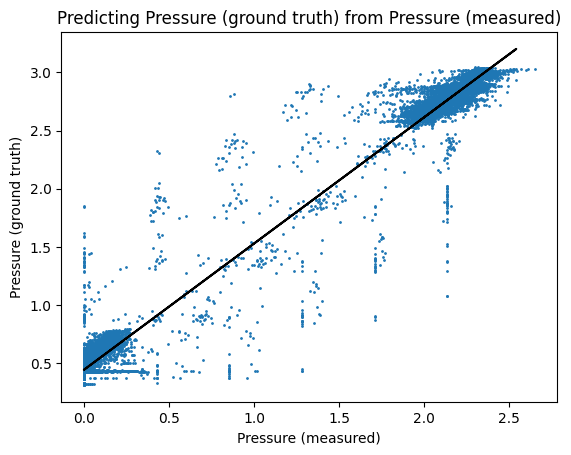

In [4]:
df_binary = df[['Pressure_ground_truth', 'Pressure']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['Pressure']).reshape(-1, 1)
y = np.array(df_binary['Pressure_ground_truth']).reshape(-1, 1)
  
# remove NaN values
df_binary.dropna(inplace = True)
  
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Drop NaN values from X_train and y_train, x_test and y_test
X_train = X_train[~np.isnan(X_train).any(axis=1)]
y_train = y_train[~np.isnan(y_train).any(axis=1)]
X_test = X_test[~np.isnan(X_test).any(axis=1)]
y_test = y_test[~np.isnan(y_test).any(axis=1)]

regr1 = LinearRegression()
regr1.fit(X_train, y_train)
print("Score: ", regr1.score(X_test, y_test))
y_pred = regr1.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X,y,s=1) 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting Pressure (ground truth) from Pressure (measured)')
plt.xlabel('Pressure (measured)')
plt.ylabel('Pressure (ground truth)')
plt.show()

Score:  0.9425816798689277
Error:  0.8695911610730724


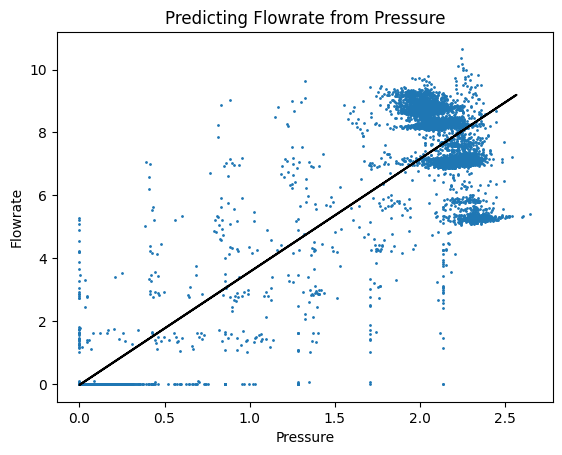

In [5]:
df_binary = df[['Flowrate', 'Pressure']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['Pressure']).reshape(-1, 1)
y = np.array(df_binary['Flowrate']).reshape(-1, 1)

# Dropping any rows with Nan values
df_binary.dropna(inplace = True)  

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

# Drop NaN values from X_train and y_train, X_test and y_test
X_train = X_train[~np.isnan(X_train).any(axis=1)]
y_train = y_train[~np.isnan(y_train).any(axis=1)]
X_test = X_test[~np.isnan(X_test).any(axis=1)]
y_test = y_test[~np.isnan(y_test).any(axis=1)]

regr = LinearRegression()
regr.fit(X_train, y_train)
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,s=1) 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting Flowrate from Pressure')
plt.xlabel('Pressure')
plt.ylabel('Flowrate')
plt.show()

Score:  0.95084381582027
Error:  0.8041922892566294


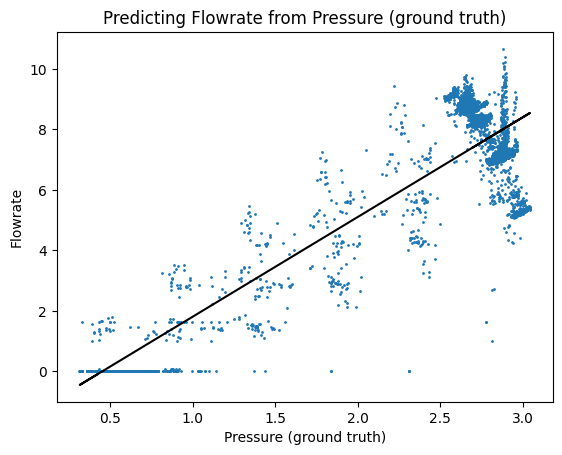

In [6]:
df_binary = df[['Flowrate', 'Pressure_ground_truth']]
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['Pressure_ground_truth']).reshape(-1, 1)
y = np.array(df_binary['Flowrate']).reshape(-1, 1)

# Dropping any rows with Nan values  
df_binary.dropna(inplace = True)

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Drop NaN values from X_train and y_train, X_test and y_test
X_train = X_train[~np.isnan(X_train).any(axis=1)]
y_train = y_train[~np.isnan(y_train).any(axis=1)]
X_test = X_test[~np.isnan(X_test).any(axis=1)]
y_test = y_test[~np.isnan(y_test).any(axis=1)]
  
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,s=1) 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting Flowrate from Pressure (ground truth)')
plt.xlabel('Pressure (ground truth)')
plt.ylabel('Flowrate')
plt.show()

In [7]:
# applying calibration using the linear regression model regr1
df['Pressure_calibrated'] = regr1.predict(np.array(df['Pressure']).reshape(-1, 1))

Score:  0.9380342751116519
Error:  0.9102676081081608


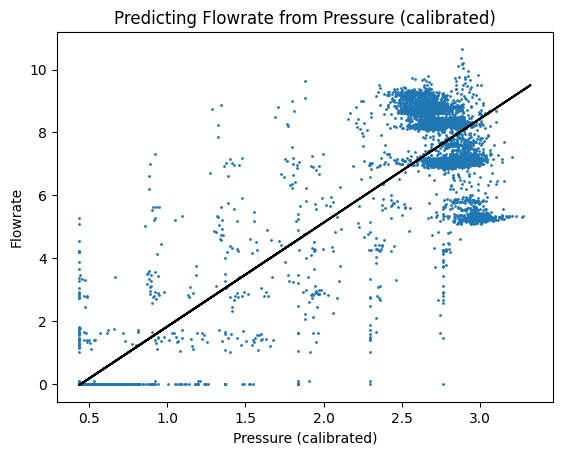

In [8]:
# train new model to predict flowrate using calibrated pressure
df_binary = df[['Flowrate', 'Pressure_calibrated']]
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['Pressure_calibrated']).reshape(-1, 1)
y = np.array(df_binary['Flowrate']).reshape(-1, 1)

# Dropping any rows with Nan values  
df_binary.dropna(inplace = True)

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Drop NaN values from X_train and y_train, X_test and y_test
X_train = X_train[~np.isnan(X_train).any(axis=1)]
y_train = y_train[~np.isnan(y_train).any(axis=1)]
X_test = X_test[~np.isnan(X_test).any(axis=1)]
y_test = y_test[~np.isnan(y_test).any(axis=1)]
  
regr = LinearRegression()
regr.fit(X_train, y_train)
# print(regr.score(X_test, y_test))
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,s=1) 
plt.plot(X_test, y_pred,color='k') 
plt.title('Predicting Flowrate from Pressure (calibrated)')
plt.xlabel('Pressure (calibrated)')
plt.ylabel('Flowrate')
plt.show()


# PH03-02

In [9]:
#read the data from the excel file
df = pd.read_excel('ph0302(2).xlsx')

Score:  0.7929589023666712
Error:  0.9297142520491839


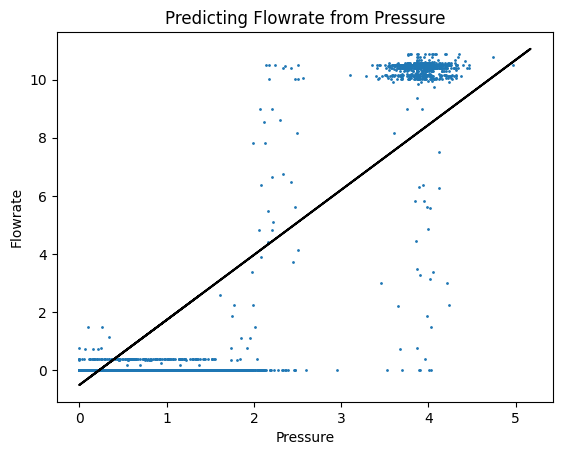

In [10]:
df_binary = df[['Flowrate', 'Pressure']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['Pressure']).reshape(-1, 1)
y = np.array(df_binary['Flowrate']).reshape(-1, 1)

# Dropping any rows with Nan values  
df_binary.dropna(inplace = True)

# Splitting the data into training and testing data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Drop NaN values from X_train and y_train, X_test and y_test
X_train = X_train[~np.isnan(X_train).any(axis=1)]
y_train = y_train[~np.isnan(y_train).any(axis=1)]
X_test = X_test[~np.isnan(X_test).any(axis=1)]
y_test = y_test[~np.isnan(y_test).any(axis=1)]
  
regr = LinearRegression()
regr.fit(X_train, y_train)
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,s=1) 
plt.plot(X_test, y_pred,color='k')
plt.title('Predicting Flowrate from Pressure')
plt.xlabel('Pressure')
plt.ylabel('Flowrate') 
plt.show()

# PH03-03

In [11]:
#read the data from the excel file
df = pd.read_excel('ph0303(preprocessed_smooth_5).xlsx')

Score:  0.9799207668716496
Error:  0.3070897556468942


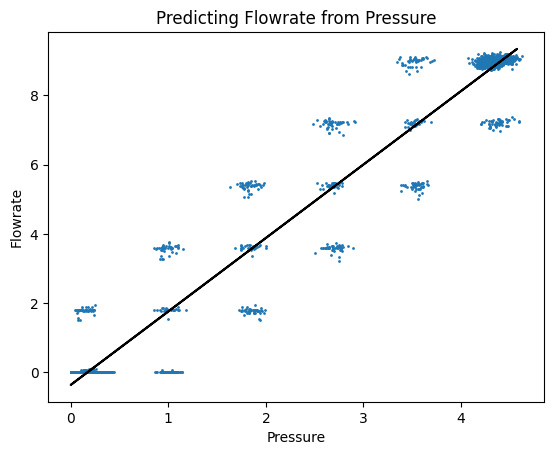

In [12]:
df_binary = df[['Flowrate', 'Pressure']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['Pressure']).reshape(-1, 1)
y = np.array(df_binary['Flowrate']).reshape(-1, 1)

# Dropping any rows with Nan values  
df_binary.dropna(inplace = True)

# Splitting the data into training and testing data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Drop NaN values from X_train and y_train, X_test and y_test
X_train = X_train[~np.isnan(X_train).any(axis=1)]
y_train = y_train[~np.isnan(y_train).any(axis=1)]
X_test = X_test[~np.isnan(X_test).any(axis=1)]
y_test = y_test[~np.isnan(y_test).any(axis=1)]
  
regr = LinearRegression()
regr.fit(X_train, y_train)
print("Score: ", regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X_train, y_train,s=1) 
plt.plot(X_test, y_pred,color='k')
plt.title('Predicting Flowrate from Pressure')
plt.xlabel('Pressure')
plt.ylabel('Flowrate') 
plt.show()

# SVM
# PH01-00

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9689564514300886
RMSE:  0.6403386864689155


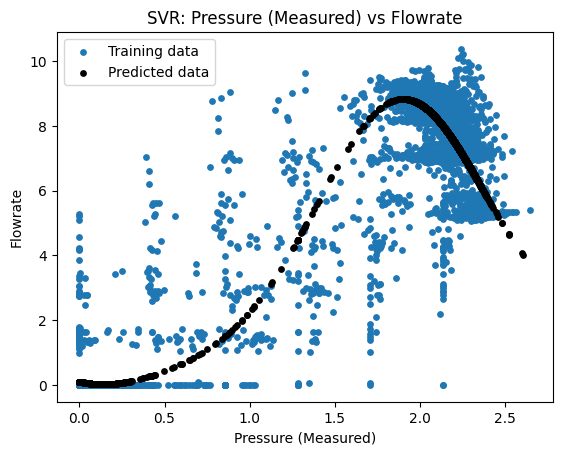

In [35]:
# Reading the dataset
df = pd.read_excel('ph0100(preprocessed_smooth_5).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['Flowrate', 'Pressure']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['Pressure']).reshape(-1, 1)
y = np.array(df_binary['Flowrate']).reshape(-1, 1)

# Dropping any rows with Nan values  
df_binary.dropna(inplace = True)

# Splitting the data into training and testing data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Drop NaN values from X_train and y_train, X_test and y_test
X_train = X_train[~np.isnan(X_train).any(axis=1)]
y_train = y_train[~np.isnan(y_train).any(axis=1)]
X_test = X_test[~np.isnan(X_test).any(axis=1)]
y_test = y_test[~np.isnan(y_test).any(axis=1)]

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, s=15)
plt.scatter(X_test, regressor.predict(X_test), color = 'black', s=15)
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure (Measured)')
plt.ylabel('Flowrate')
# title
plt.title('SVR: Pressure (Measured) vs Flowrate')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9861976051354755
RMSE:  0.4278896417726841


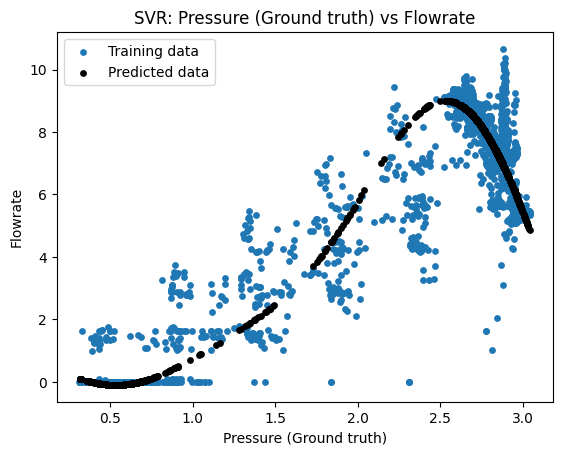

In [36]:
# Reading the dataset
df = pd.read_excel('ph0100(preprocessed_smooth_5).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['Flowrate', 'Pressure_ground_truth']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['Pressure_ground_truth']).reshape(-1, 1)
y = np.array(df_binary['Flowrate']).reshape(-1, 1)

# Dropping any rows with Nan values  
df_binary.dropna(inplace = True)

# Splitting the data into training and testing data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Drop NaN values from X_train and y_train, X_test and y_test
X_train = X_train[~np.isnan(X_train).any(axis=1)]
y_train = y_train[~np.isnan(y_train).any(axis=1)]
X_test = X_test[~np.isnan(X_test).any(axis=1)]
y_test = y_test[~np.isnan(y_test).any(axis=1)]

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, s=15)
plt.scatter(X_test, regressor.predict(X_test), color = 'black', s=15)
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure (Ground truth)')
plt.ylabel('Flowrate')
# title
plt.title('SVR: Pressure (Ground truth) vs Flowrate')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9729590727873735
RMSE:  0.5909255927410838


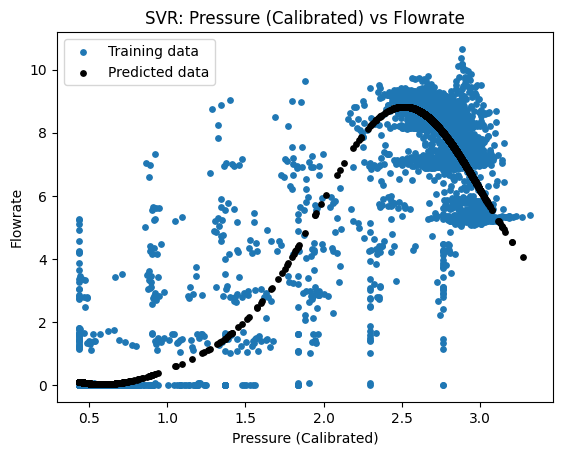

In [37]:
# applying calibration using the linear regression model regr1
df['Pressure_calibrated'] = regr1.predict(np.array(df['Pressure']).reshape(-1, 1))

# train new model to predict flowrate using calibrated pressure
df_binary = df[['Flowrate', 'Pressure_calibrated']]
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['Pressure_calibrated']).reshape(-1, 1)
y = np.array(df_binary['Flowrate']).reshape(-1, 1)

# Dropping any rows with Nan values  
df_binary.dropna(inplace = True)

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Drop NaN values from X_train and y_train, X_test and y_test
X_train = X_train[~np.isnan(X_train).any(axis=1)]
y_train = y_train[~np.isnan(y_train).any(axis=1)]
X_test = X_test[~np.isnan(X_test).any(axis=1)]
y_test = y_test[~np.isnan(y_test).any(axis=1)]
  

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, s=15)
plt.scatter(X_test, regressor.predict(X_test), color = 'black', s=15)
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure (Calibrated)')
plt.ylabel('Flowrate')
# title
plt.title('SVR: Pressure (Calibrated) vs Flowrate')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)


# PH03-02

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.970216682082945
RMSE:  0.33068622554553984


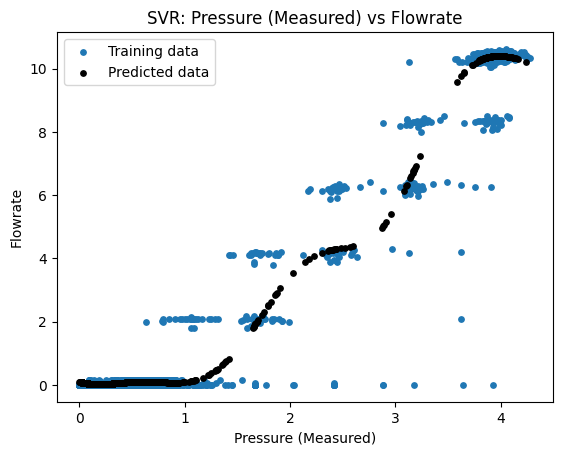

In [38]:
# Reading the dataset
df = pd.read_excel('ph0302(preprocessed_smooth_5).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['Flowrate', 'Pressure']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['Pressure']).reshape(-1, 1)
y = np.array(df_binary['Flowrate']).reshape(-1, 1)

# Dropping any rows with Nan values  
df_binary.dropna(inplace = True)

# Splitting the data into training and testing data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Drop NaN values from X_train and y_train, X_test and y_test
X_train = X_train[~np.isnan(X_train).any(axis=1)]
y_train = y_train[~np.isnan(y_train).any(axis=1)]
X_test = X_test[~np.isnan(X_test).any(axis=1)]
y_test = y_test[~np.isnan(y_test).any(axis=1)]

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
plt.scatter(X_train, y_train, s=15)
plt.scatter(X_test, regressor.predict(X_test), color = 'black', s=15)
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure (Measured)')
plt.ylabel('Flowrate')
# title
plt.title('SVR: Pressure (Measured) vs Flowrate')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)

# PH03-03

c:\Users\gandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.985612503759324
RMSE:  0.24669710327340275


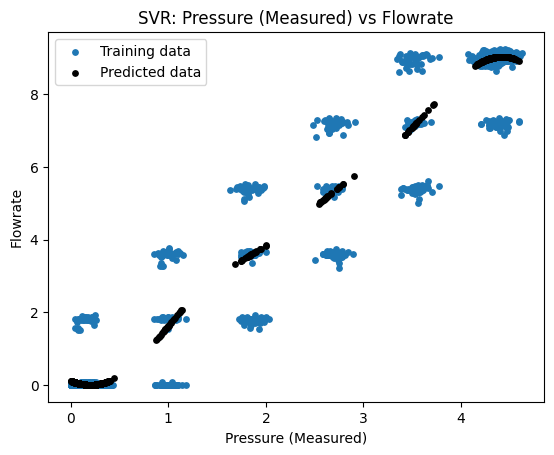

In [34]:
# Reading the dataset
df = pd.read_excel('ph0303(preprocessed_smooth_5).xlsx')
df = df.drop('created_at', axis=1)
df = df.drop('entry_id', axis=1)
df_binary = df[['Flowrate', 'Pressure']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['Pressure']).reshape(-1, 1)
y = np.array(df_binary['Flowrate']).reshape(-1, 1)

# Dropping any rows with Nan values  
df_binary.dropna(inplace = True)

# Splitting the data into training and testing data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Drop NaN values from X_train and y_train, X_test and y_test
X_train = X_train[~np.isnan(X_train).any(axis=1)]
y_train = y_train[~np.isnan(y_train).any(axis=1)]
X_test = X_test[~np.isnan(X_test).any(axis=1)]
y_test = y_test[~np.isnan(y_test).any(axis=1)]

# Fitting the Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

# Visualising the SVR results
# color = light blue
plt.scatter(X_train, y_train, s=15)
plt.scatter(X_test, regressor.predict(X_test), color = 'black', s=15)
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure (Measured)')
plt.ylabel('Flowrate')
# title
plt.title('SVR: Pressure (Measured) vs Flowrate')

# Check accuracy
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)